Arnie Larson

EEP 506, Spring 2022

Homework 2.5 (some probability example problems)



In [2]:
import numpy as np
from scipy import signal
from scipy import special
import matplotlib 
import matplotlib.pyplot as plt

### Problem 1

Gaussian distribution and Q function.  A random variable $\mathbf{x}$ is a numerical outcome of a random experiment.

For a Gaussian random variable, probability density $f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{ x - \mu}{\sigma})^2}$

The standard normal distribution has normalization such that $\mu = 0$ and $\sigma = 1$

$f(x)dx = Pr \{ \mathbf{x}  \in (x,x+dx) \}$

$F(x) = Pr \{ \mathbf{x} \leq x \}$

$\bar{F}(x) = Pr \{ \mathbf{x} \gt x \}$; $Q(x) \equiv \bar{F}(x)$

The cumulative distribution function $Q(x)$ can be evaluated in terms of special functions $Q(x) = \frac{1}{2}erfc(x/\sqrt{2})$

In [3]:
# Plot cumulative dist of Standard Normal (mu = 1; sigma = 1)
# x is multiples of sigma, you can approximately see e.g. 3 sigma, 6 sigma, etc..

x = np.linspace(-7, 7, 100000)
f = 1 - 0.5 * special.erfc(x/np.sqrt(2))

Text(0.5, 1.0, 'F(x) logy')

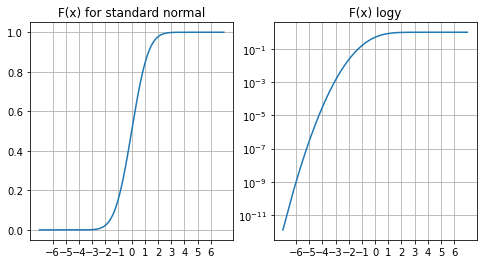

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(x, f); ax1.grid()
ax1.set_xticks(range(-6,7,1))
ax1.set_title("F(x) for standard normal")
ax2.semilogy(x, f); ax2.grid()
ax2.set_xticks(range(-6,7,1))
ax2.set_title("F(x) logy")

### Problem 2

Gaussian RVs as thermal noise w power $P_n = kTB$

Noise Power is often expressed in dBm; $10 log_{10}\frac{P_n}{1mW}$ decibel per milliwatt

Example at $K = 290$ the for 1 $Hz$; $P_n = -174 dBm$

In [12]:
# Pn_1Hz = 10 log10 (P * 1 Hz / 1mW) = -174
P = 10**-17.4  # in mW
# Pn_1MHz = 10 log10 (P * 1e6 / 1mW) = -114
P_1MHz = 10 * np.log10(10**-17.4 * 1e6) ## in mW

In [14]:
#Noise Power from -114 dBm (in mW and Watts) 4e-15 Watts
P_n = 10**-11.4
print("Noise Power [mW] (room temp over 1MHz): {}".format(P_n))
print("Noise Power [W]  (room temp over 1MHz): {}".format(P_n*1e-3))

Noise Power [mW] (room temp over 1MHz): 3.9810717055349695e-12
Noise Power [W]  (room temp over 1MHz): 3.9810717055349695e-15


Given a noise power of $4e^{-15} Watts$ leads to a standard deviation of $6.3e^{-8} Volts$ (if you think of the Noise Power as Volts^2 over a 1 Ohm resistor)

Compute noise voltage probabilities, (I assume that we care about the magnitude of the noise voltage so I take into account both sides of the PDF)

$P \{\mathbf{n} \gt 1e^{-7}\} \approx 11\%$  (liklihood value is greater than 1.6 sigma)

$P \{\mathbf{n} \lt 1e^{-8}\} \approx 12\%$  (liklihood that the value is less than .16 sigma)

In [18]:
# First one - equivalent to an experimental outcome of t = x/sigma
x = 1e-7/6.3e-8   # 1.587 sigma
y = 1e-8/6.3e-8   # 0.159 sigma
print("First one, value is gt than {} sigma".format(x))
print("Second one, value is lt than {} sigma".format(y))

First one, value is gt than 1.5873015873015874 sigma
Second one, value is lt than 0.15873015873015875 sigma


In [20]:
# First one, basically the liklihood that the value is > 1.59 sigma
# = 
rs = 0.5 * special.erfc(x/np.sqrt(2))  
ls = 1 - 0.5 * special.erfc(-x/np.sqrt(2))
p1 = rs + ls; print("Prob1: {}".format(p1))

Prob1: 0.11244435592108926


In [21]:
# second, liklihood that the value has magnitude less than .16 sigma
ls = 0.5 * special.erfc(-y/np.sqrt(2))  
rs = 0.5 * special.erfc(y/np.sqrt(2))  
p2 = ls - rs; print("Prob1: {}".format(p2))

Prob1: 0.12611852382620659


### Problem 3 

For a standard normal RV with zero mean and unit variance compute

$P \{4 + 2\mathbf{t} \gt 8\}$

This should be equivalent to 

$P \{\mathbf{t} \gt 2\} \approx 2.3 \% $

Which matches the intuition that $95\%$ of the values of the standard normal should be within $2 \sigma$ and so for a single side test this should this should be close to $2.5\%$

In [22]:
# Prob t > 2
p3=0.5 * special.erfc(2/np.sqrt(2)); print("prob t > 2 = {}".format(p3))

prob t > 2 = 0.022750131948179216
